# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [2]:
DATASET_PATH = "./data/heart_disease/"

In [3]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

df = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [5]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [6]:
df[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [7]:
y = df[target].values
sano_mask = y == 0
enfermo_mask = y > 0
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

df[target]=y_class


In [8]:
pca = PCA(n_components=0.9).fit(df[numerical_features])
pca.n_components_

2

In [9]:
X_transformed = pca.transform(df[numerical_features])

<Axes: >

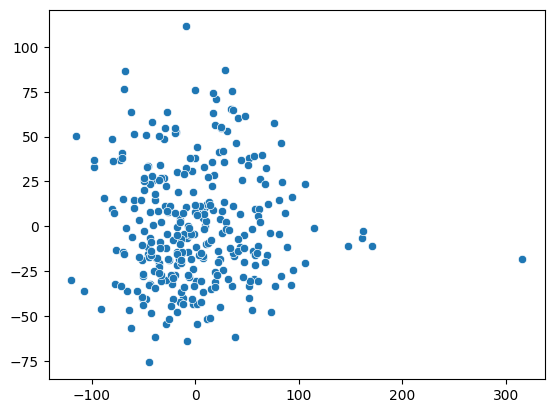

In [10]:
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1])

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

Encoding de variables categóricas

In [12]:
df = pd.get_dummies(df, columns=categorical_features)

In [13]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num', 'sex_0.0',
       'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0',
       'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0',
       'ca_3.0', 'ca_?', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?'],
      dtype='object')

Tratamiento de datos faltantes

In [14]:
df.isna().sum().sum()

0

No hay datos faltantes. Pero sí hay columnas con valor "?", veamos cuantas son.

In [15]:
len(df[df['ca_?']==1]), len(df[df['thal_?']==1])

(4, 2)

Son muy pocas filas respecto del total. Podemos hacer un drop.

In [16]:
df=df[(df['ca_?']==0)&(df['thal_?']==0)]
df.drop(['ca_?', 'thal_?'], axis=1, inplace=True)

Partición train test

In [17]:
y=df[target]
X=df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 28), (30, 28), (266,), (30,))

Balanceo de clases

In [18]:
y_train.value_counts()

num
0    142
1    124
Name: count, dtype: int64

Las clases están balanceadas.

Estandarización

In [19]:
std=StandardScaler()
X_train[numerical_features] = std.fit_transform(X_train[numerical_features])
X_test[numerical_features] = std.transform(X_test[numerical_features])

In [20]:
len(df.columns)

29

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


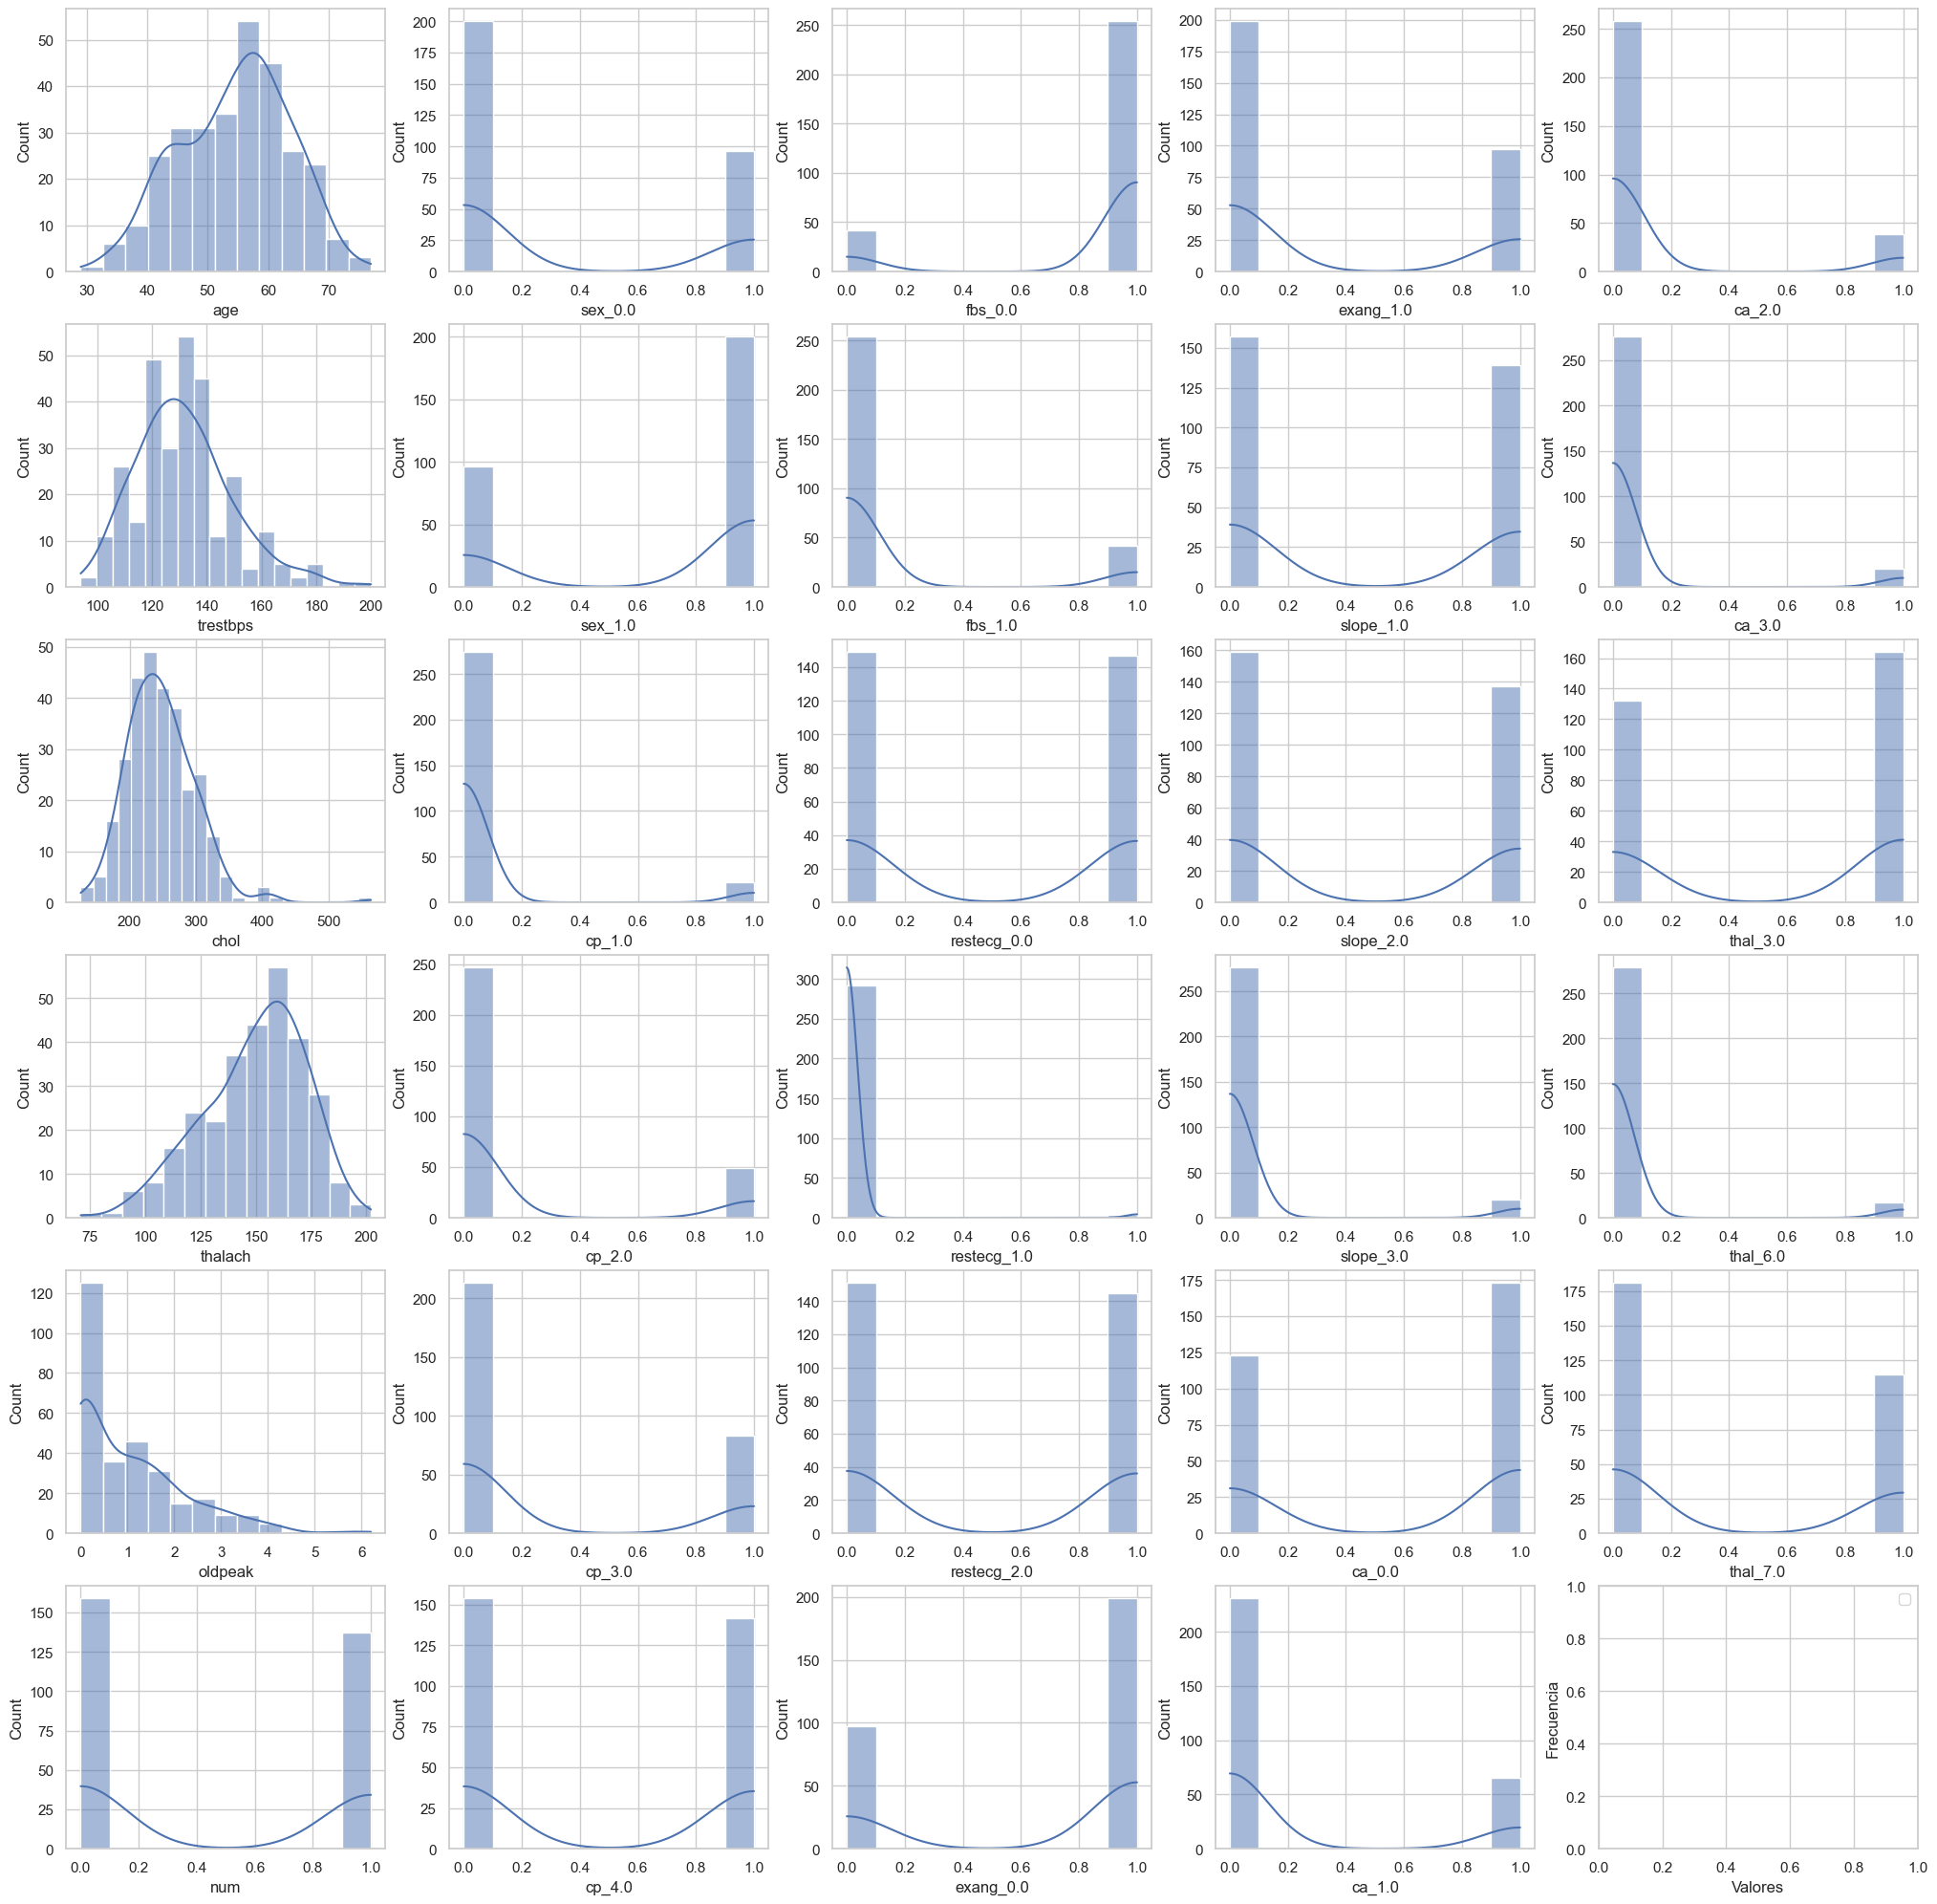

In [21]:
import warnings
warnings.simplefilter('ignore')
sns.set(style="whitegrid")
fig, ax = plt.subplots(6, 5, figsize=(25,25))

i=0
j=0
for column in df.columns:
    sns.histplot(df[column], kde=True, label=column, ax = ax[i][j])
    i+=1
    if i==6:
        i=0    
        j+=1

plt.legend()
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


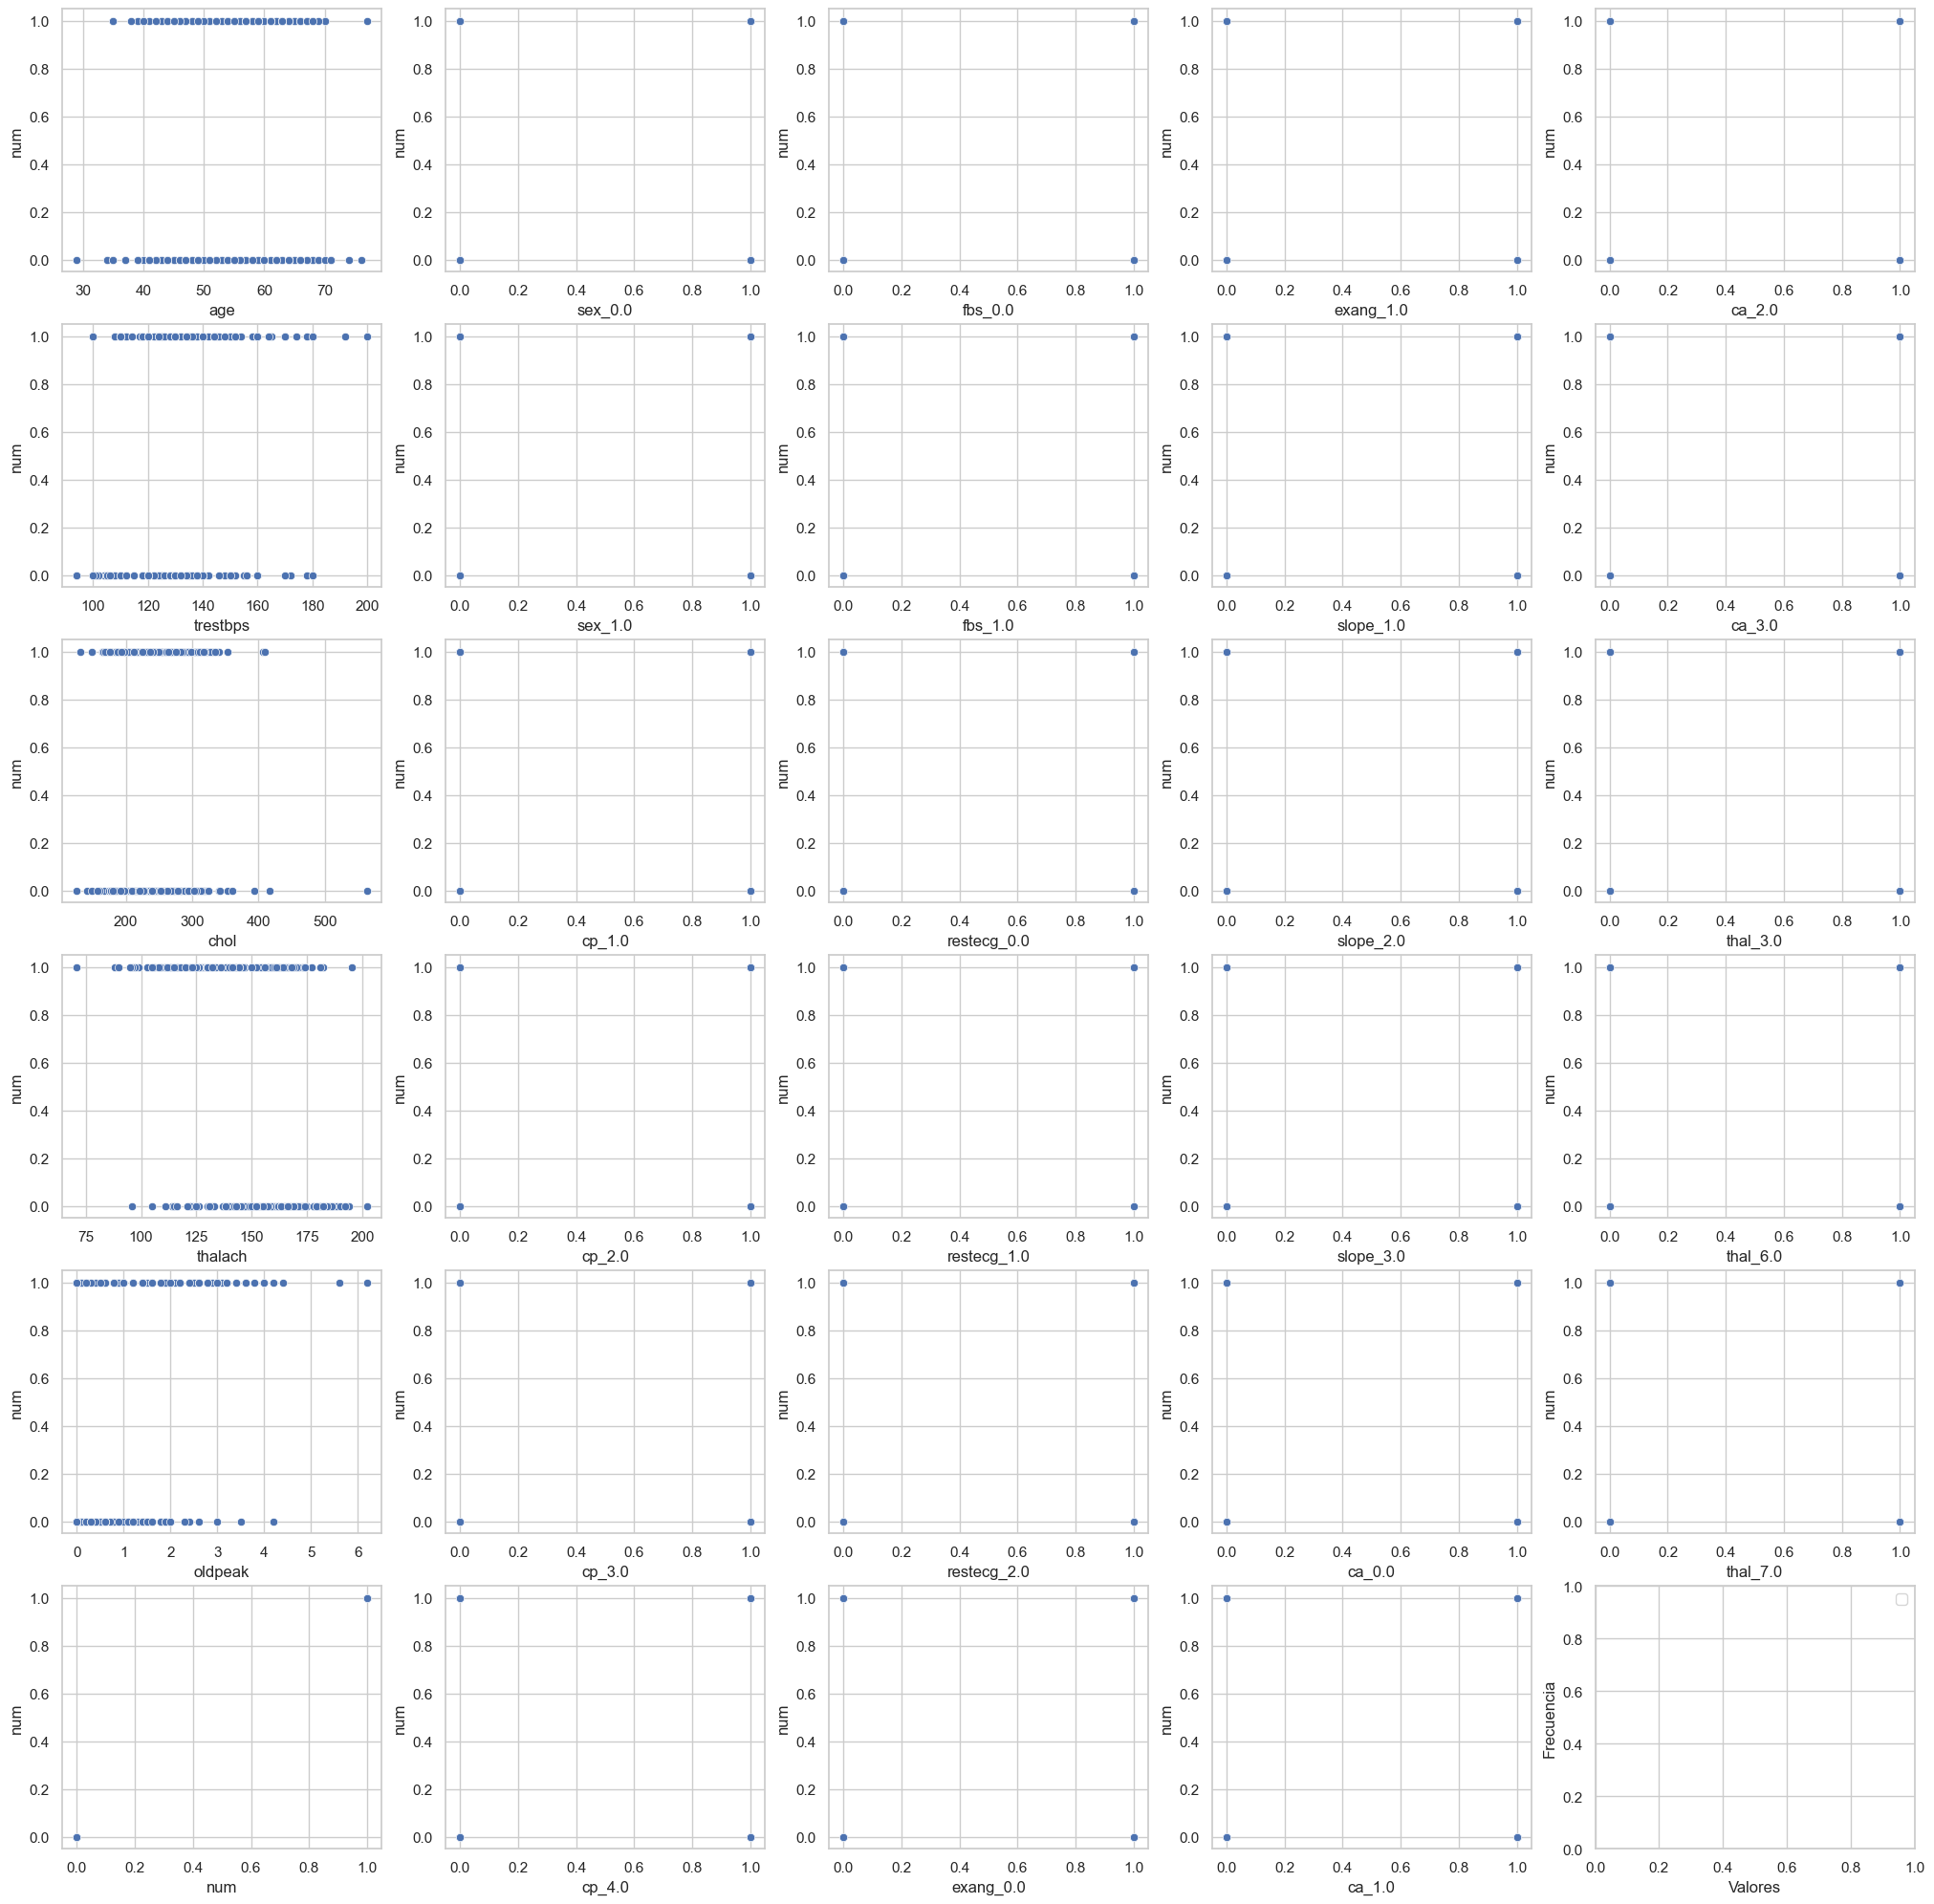

In [22]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(6, 5, figsize=(25,25))

i=0
j=0
for column in df.columns:
    sns.scatterplot(data=df, x=column, y=target, ax = ax[i][j])
    i+=1
    if i==6:
        i=0    
        j+=1

plt.legend()
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Análisis de correlación

In [23]:
X_train[numerical_features]

,age,trestbps,chol,thalach,oldpeak,thalach
196,-1.064218,0.357778,-0.240453,0.103612,-0.725804,0.103612
33,-1.174711,-0.090339,-0.297886,1.269974,-0.555853,1.269974
225,-0.843233,-1.098603,-0.853066,-0.285176,-0.810779,-0.285176
219,-1.506189,-1.098603,0.372159,0.967584,-0.895754,0.967584
200,1.035141,2.710392,1.463376,0.190009,-0.895754,0.190009
...,...,...,...,...,...,...
190,-0.401263,0.469807,0.946484,-1.192347,2.673207,-1.192347
71,0.814156,-0.650486,0.353015,-2.185915,0.633800,-2.185915
107,0.703663,-0.650486,0.219006,-0.414772,2.163355,-0.414772
274,1.035141,2.150246,-0.412751,0.233208,-0.385903,0.233208


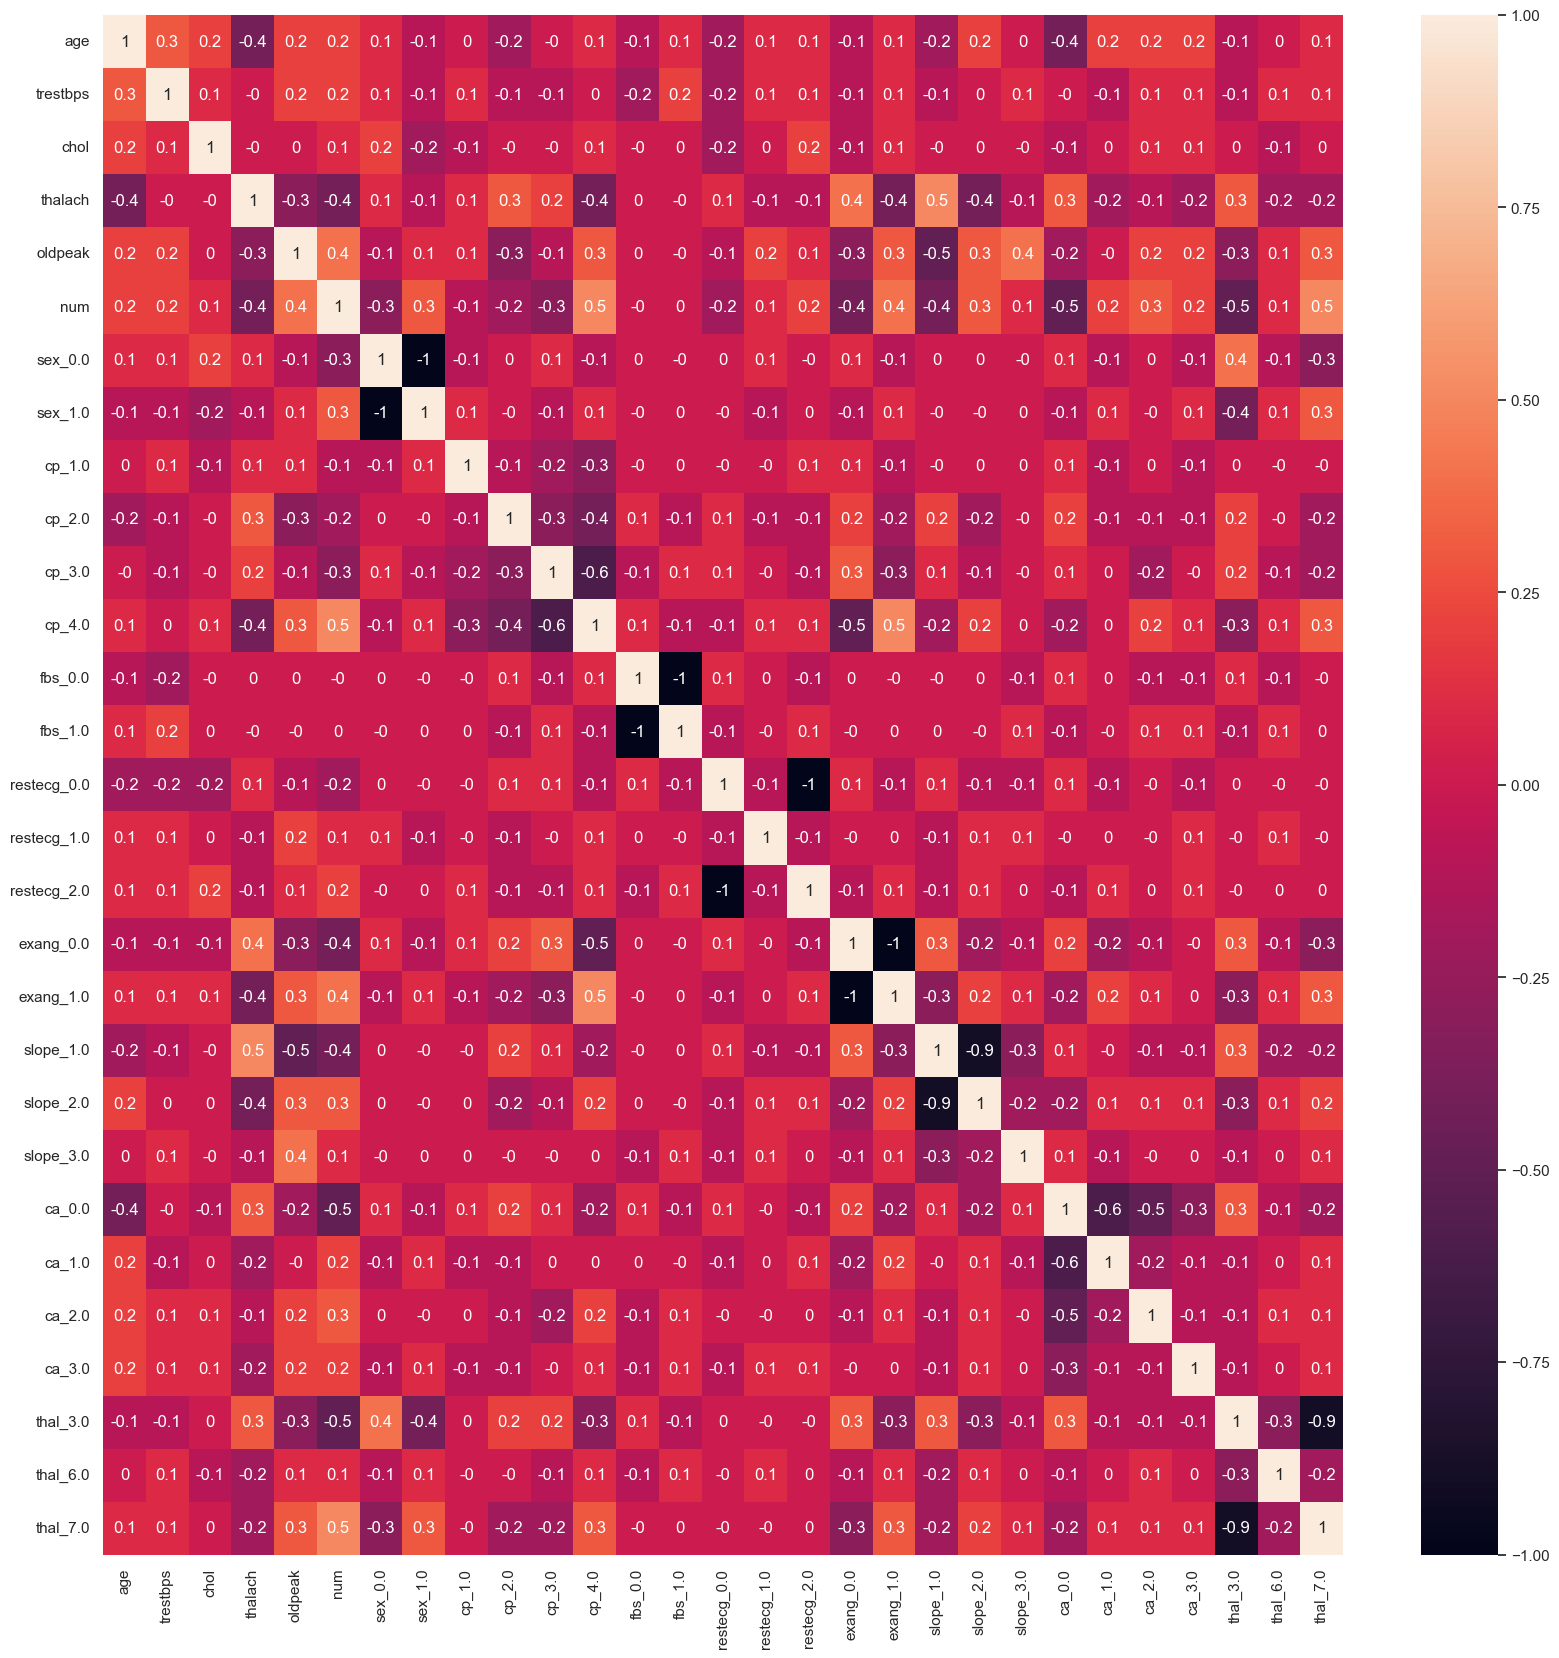

In [24]:
corr = df.corr().round(1)
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [25]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, roc_auc

In [26]:
pca = PCA(n_components=0.9).fit(X_train[numerical_features])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca.n_components_

12

In [42]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LR_CV = LogisticRegressionCV()
LR_CV.fit(X_train, y_train)

LR_L1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
LR_L1.fit(X_train, y_train)

LR_L2 = LogisticRegression(penalty='l2', random_state=42)
LR_L2.fit(X_train, y_train)

LR_pca = LogisticRegression()
LR_pca.fit(X_train_pca, y_train)

LR_CV_pca = LogisticRegressionCV()
LR_CV_pca.fit(X_train_pca, y_train)

LR_L1_pca = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
LR_L1_pca.fit(X_train_pca, y_train)

LR_L2_pca = LogisticRegression(penalty='l2', random_state=42)
LR_L2_pca.fit(X_train_pca, y_train)

models=[LR, LR_CV, LR_L1, LR_L2, LR_pca, LR_CV_pca, LR_L1_pca, LR_L2_pca]
metricas=pd.DataFrame(columns=['Conjunto','Tipo','PCA','accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [43]:
i=0
for model in models:
    if model==LR or model==LR_pca:
        tipo='Sin'
    elif model==LR_L1 or model==LR_L1_pca:
        tipo='L1'
    elif model==LR_L2 or model==LR_L2_pca:
        tipo='L2'
    elif model==LR_CV or model==LR_CV_pca:
        tipo='CV'

    if model==LR_pca or model==LR_CV_pca or model==LR_L1_pca or model==LR_L2_pca:
        X_train_a_usar=X_train_pca
        X_test_a_usar=X_test_pca
        pca_comp=True
    else:
        X_train_a_usar=X_train
        X_test_a_usar=X_test
        pca_comp=False

    
    y_train_pred=model.predict(X_train_a_usar)
    y_pred=model.predict(X_test_a_usar)
    accuracy, precision, recall, f1, roc_auc=metrics(y_train, y_train_pred)
    metricas.loc[i]=['train', tipo, pca_comp, accuracy, precision, recall, f1, roc_auc]
    i+=1

    accuracy, precision, recall, f1, roc_auc=metrics(y_test, y_pred)
    metricas.loc[i]=['test', tipo, pca_comp, accuracy, precision, recall, f1, roc_auc]
    i+=1
        

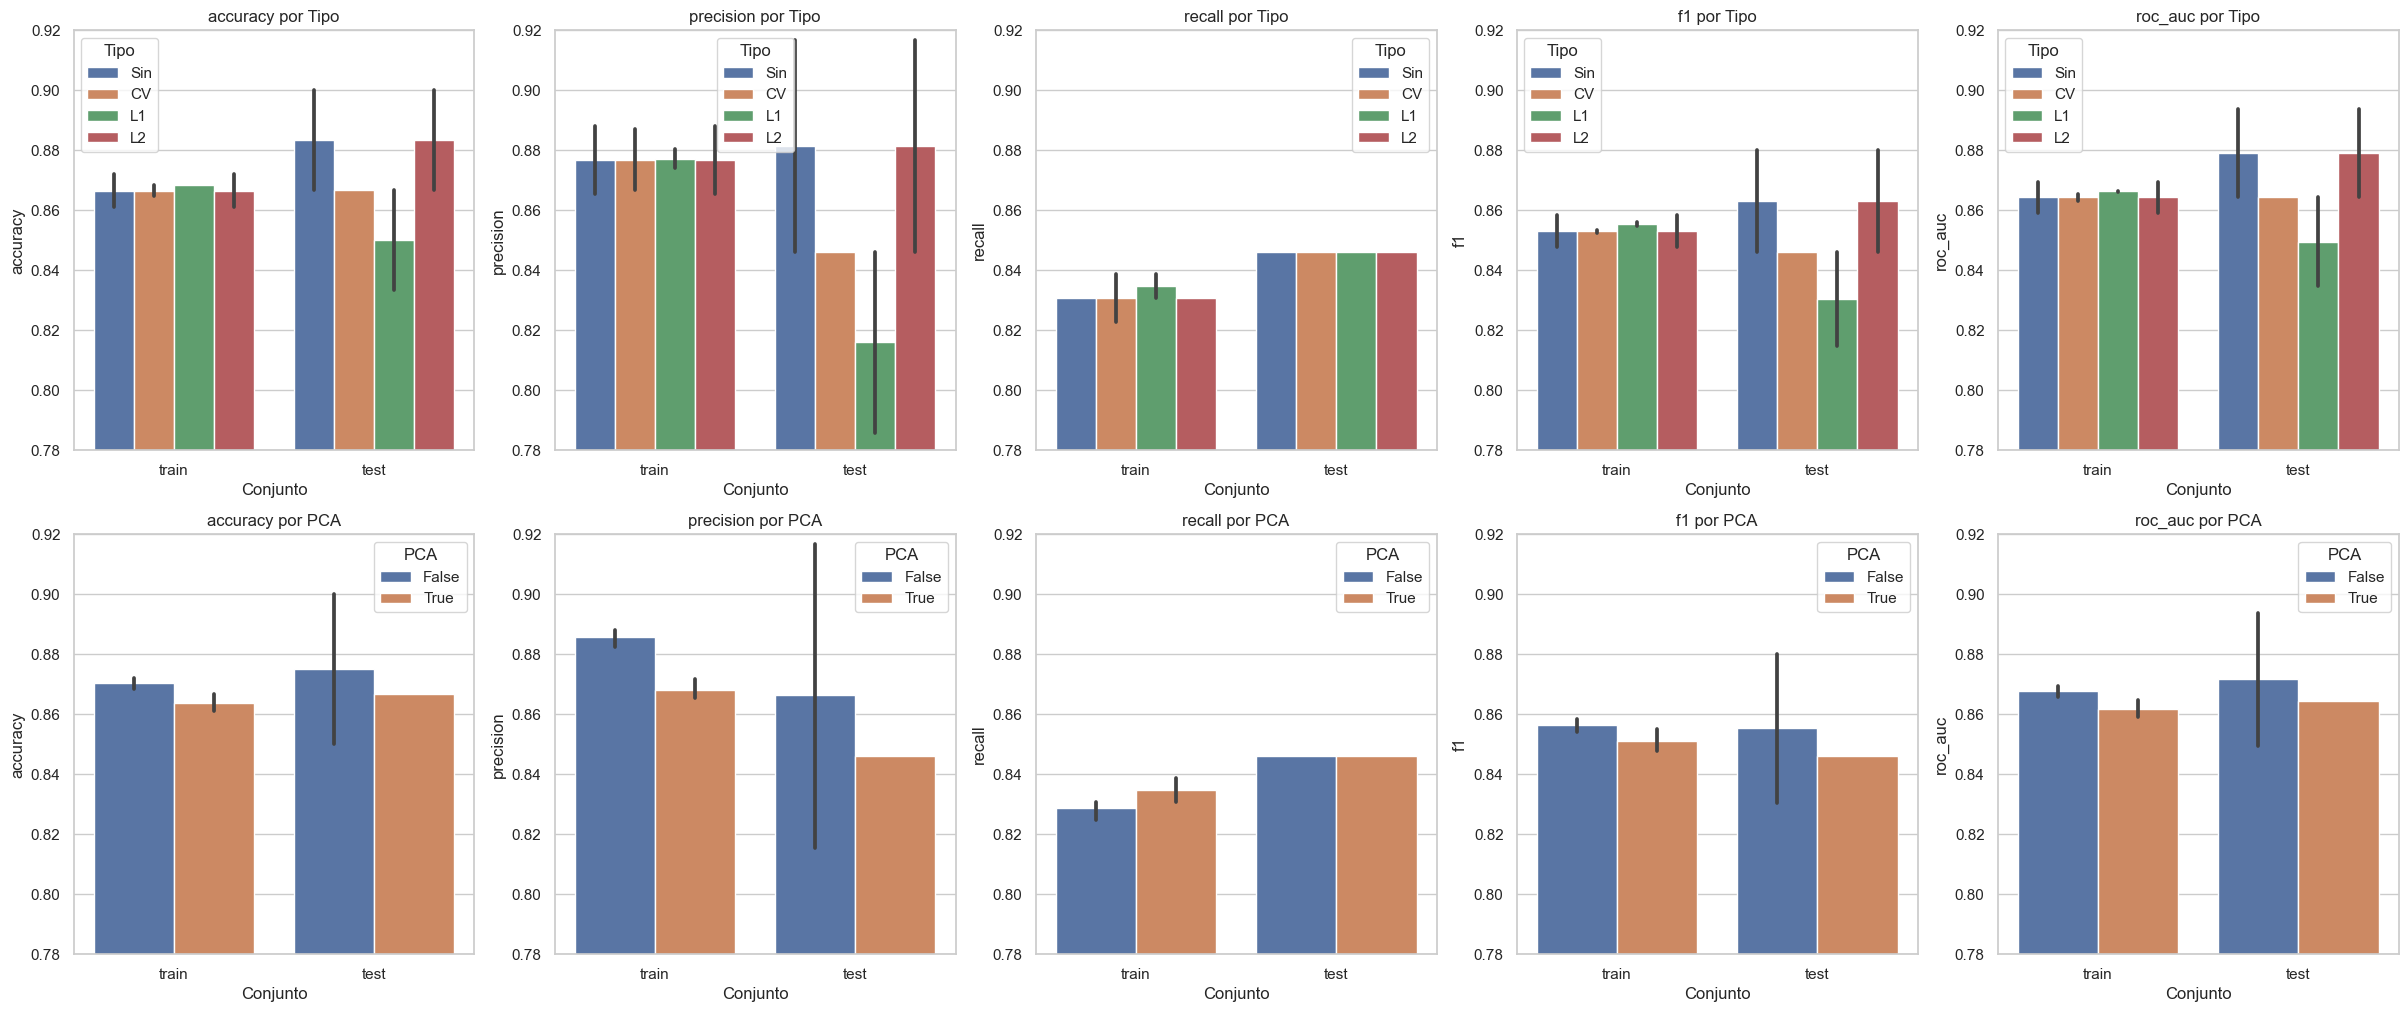

In [45]:
fig, ax=plt.subplots(2,5,figsize=(30,12))
metrics=['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for i in range(2):
    if i==0:
        hue='Tipo'
    else:
        hue='PCA'

    for j in range(5):
        metrica=metrics[j]
        ax[i][j].set_ylim(0.78,0.92)
        ax[i][j].set_title(metrica+ ' por '+hue)
        sns.barplot(data=metricas, x='Conjunto', y=metrica, hue=hue, ax=ax[i][j])


In [30]:
metricas

,Conjunto,Tipo,PCA,accuracy,precision,recall,f1,roc_auc
0,train,Sin,False,0.872180,0.887931,0.830645,0.858333,0.869548
1,test,Sin,False,0.900000,0.916667,0.846154,0.880000,0.893665
2,train,CV,False,0.868421,0.886957,0.822581,0.853556,0.865516
3,test,CV,False,0.866667,0.846154,0.846154,0.846154,0.864253
4,train,L1,False,0.868421,0.880342,0.830645,0.854772,0.866027
5,test,L1,False,0.833333,0.785714,0.846154,0.814815,0.834842
6,train,L2,False,0.872180,0.887931,0.830645,0.858333,0.869548
7,test,L2,False,0.900000,0.916667,0.846154,0.880000,0.893665
8,train,Sin,True,0.860902,0.865546,0.830645,0.847737,0.858985
9,test,Sin,True,0.866667,0.846154,0.846154,0.846154,0.864253


Conclusiones

Se han podido implementar distintas regresiones logísticas capaces de realizar predicciones acerca si la persona está sana o tiene alguna condición, sin distinguir cual, a partir del dataset brindado.
Las métricas de todos los modelos son considerablemente mayores que un valor aleatorio (0.5 de accuracy). En líneas generales puede verse que no hay una tendencia al sobreajuste (métricas de test mayores que de train), sino que son parejas.
Los modelos que mejores métricas arrojan son la regresión logística sin ninguna variante, y la regresión logística con regularización L2, y sin la aplicación de PCA. Esto se debe a que en este caso, aplicar PCA como fue realizado (con 3 componentes, al 90% de importacia) ha perdido información necesaria, y por lo tanto no debe realizarse esta reducción. De hecho vemos que las métricas con o sin L2 son las mismas y esto también quiere decir que L2 no hizo penalizaciones, siendo todas las features importantes.
